In [2]:
import warnings # suppress warnings
warnings.filterwarnings('ignore')
#########################################
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
#########################################
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import QuantileTransformer
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv', index_col='id')
df_test = pd.read_csv("test.csv", index_col='id')
df_sample = pd.read_csv('sample_submission.csv')

In [13]:
df_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df_train.shape, df_test.shape, df_sample.shape

((136429, 13), (90954, 12), (90954, 2))

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 14.6+ MB


In [11]:
df_train.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


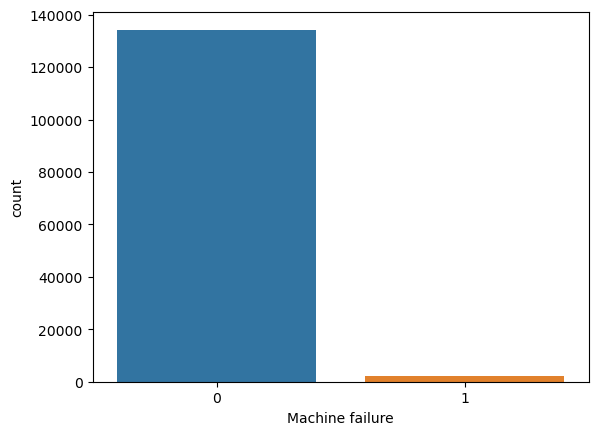

In [12]:
sns.countplot(x='Machine failure', data=df_train)
plt.show()

In [6]:
train  = df_train.copy()
test   = df_test.copy()
target = train.pop('Machine failure')

In [8]:
features = train.columns.tolist()

# Categorical features
cat_features = ['Product ID', 'Type']

# Binary features
bin_features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Numerical features
num_features = [f for f in features if f not in (cat_features + bin_features)]
              
print(':' * 40)
print('The number of Categorical_features:', len(cat_features)) 
print('The number of Binary_features:', len(bin_features))  
print('The number of Numerical_features:', len(num_features)) 
print(':' * 40)
print('The total number of features:', len(features))
print(':' * 40)

::::::::::::::::::::::::::::::::::::::::
The number of Categorical_features: 2
The number of Binary_features: 5
The number of Numerical_features: 5
::::::::::::::::::::::::::::::::::::::::
The total number of features: 12
::::::::::::::::::::::::::::::::::::::::


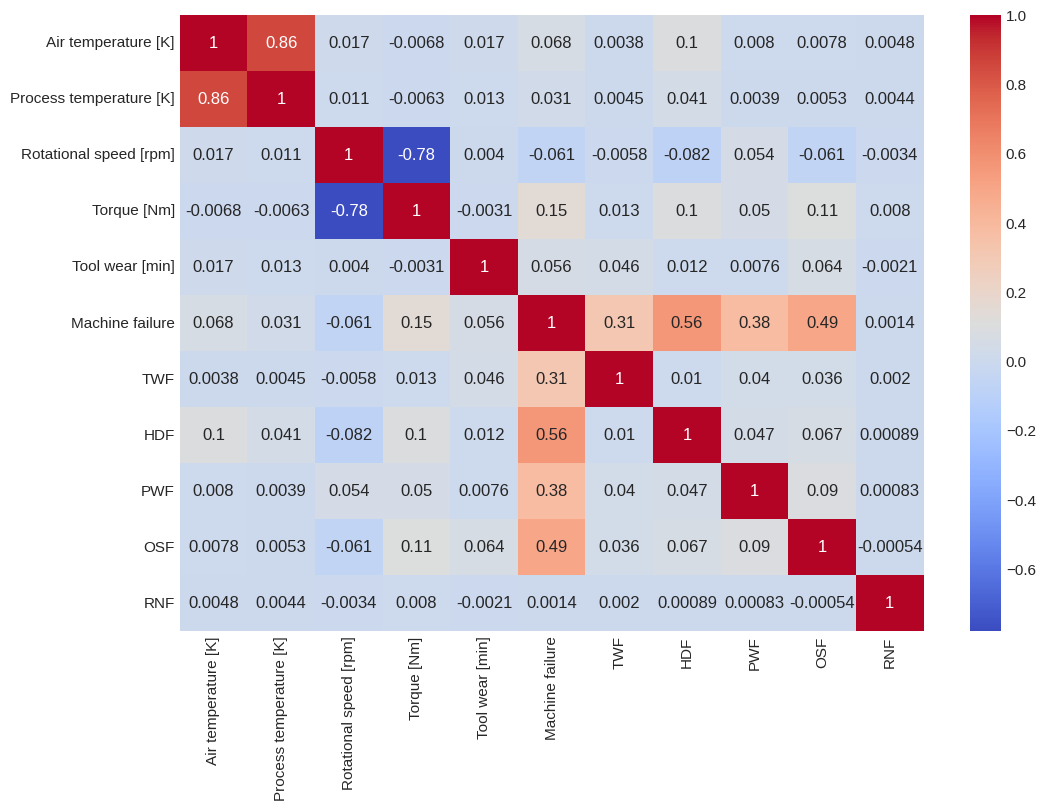

In [18]:
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

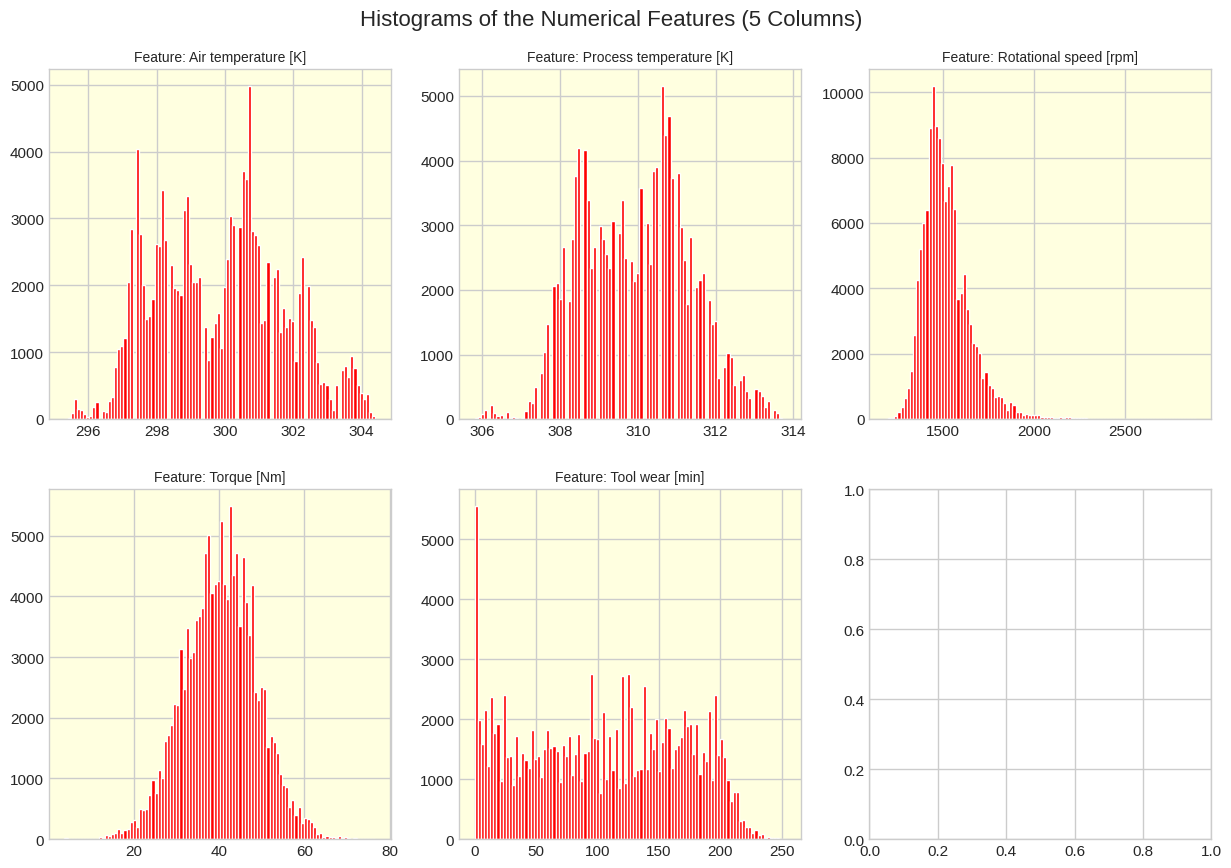

In [16]:
sns.set()
plt.style.use('seaborn-whitegrid') 
_, axs = plt.subplots(2, 3, figsize=(15,10))
for f, ax in zip(num_features, axs.ravel()):
    ax.set_facecolor('lightyellow')
    ax.hist(train[f], bins=100, color='red')
    ax.set_title(f'Feature: {f}', fontsize=10)

plt.suptitle('Histograms of the Numerical Features (5 Columns)', y=0.94, fontsize=16)
plt.show()

In [22]:
scaler = StandardScaler()

df_train[num_features] = scaler.fit_transform(df_train[num_features])
df_test[num_features] = scaler.fit_transform(df_test[num_features])

In [23]:
def fix_names(df):
    df.columns = df.columns.str.replace('[\[\]]', '', regex=True)
    return df

df_train = fix_names(df_train)
df_test  = fix_names(df_test)

In [25]:
df_train = df_train.drop(['Product ID'] , axis=1)
df_test = df_test.drop(['Product ID'] , axis=1)

In [26]:
features = df_train.columns.tolist()
features.remove('Machine failure')

# Categorical features
cat_features = ['Type']

# Binary features
bin_features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Numerical features
num_features = [f for f in features if f not in (cat_features + bin_features)]

In [29]:
train_code = pd.get_dummies(df_train, columns=cat_features)
test_code = pd.get_dummies(df_test, columns=cat_features)
target = train_code.pop('Machine failure')

train_code.shape, test_code.shape, target.shape

((136429, 13), (90954, 13), (136429,))

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90954 entries, 136429 to 227382
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type                   90954 non-null  object 
 1   Air temperature K      90954 non-null  float64
 2   Process temperature K  90954 non-null  float64
 3   Rotational speed rpm   90954 non-null  float64
 4   Torque Nm              90954 non-null  float64
 5   Tool wear min          90954 non-null  float64
 6   TWF                    90954 non-null  int64  
 7   HDF                    90954 non-null  int64  
 8   PWF                    90954 non-null  int64  
 9   OSF                    90954 non-null  int64  
 10  RNF                    90954 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 8.3+ MB


In [32]:
test_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90954 entries, 136429 to 227382
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Air temperature K      90954 non-null  float64
 1   Process temperature K  90954 non-null  float64
 2   Rotational speed rpm   90954 non-null  float64
 3   Torque Nm              90954 non-null  float64
 4   Tool wear min          90954 non-null  float64
 5   TWF                    90954 non-null  int64  
 6   HDF                    90954 non-null  int64  
 7   PWF                    90954 non-null  int64  
 8   OSF                    90954 non-null  int64  
 9   RNF                    90954 non-null  int64  
 10  Type_H                 90954 non-null  uint8  
 11  Type_L                 90954 non-null  uint8  
 12  Type_M                 90954 non-null  uint8  
dtypes: float64(5), int64(5), uint8(3)
memory usage: 7.9 MB


In [45]:
transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(train_code))

pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(train_code, target)
score = cross_val_score(pipeline, train_code, target, scoring='roc_auc', cv=10).mean()
print(f'roc_auc : {score}')

roc_auc : 0.9471250802525045



>>>>> ROC_AUC: 0.94842490 <<<<<



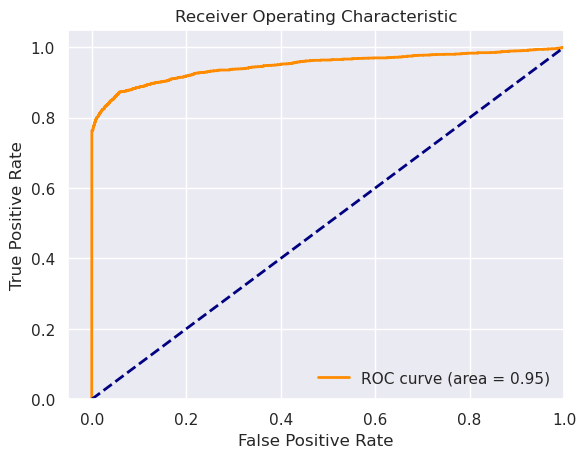

In [49]:
probs = pipeline.predict_proba(train_code)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(target, probs)
roc_auc = auc(fpr, tpr)
print(f'\n>>>>> ROC_AUC: %0.8f <<<<<\n' %roc_auc)
# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [47]:
preds_bayes = pipeline.predict_proba(test_code)[:,1]
preds_bayes

array([4.15373362e-13, 2.82053521e-13, 2.76755826e-13, ...,
       3.60763883e-14, 6.28301852e-14, 5.26300050e-13])

In [52]:
sub_bayes = df_sample.copy()
sub_bayes['Machine failure'] = preds_bayes
sub_bayes.to_csv('NB4_dummy.csv',index=False)

In [51]:
sub_import1 = pd.read_csv('submission_78.csv')
sub_import2 = pd.read_csv('submission_cat_3.csv')

In [53]:
sub = df_sample.copy()
sub['Machine failure'] = (0.20 * sub_bayes['Machine failure']) + (0.10 * sub_import1['Machine failure']) + (0.70 * sub_import2['Machine failure'])
sub.to_csv('NB4.csv',index=False)

In [71]:
sub = df_sample.copy()
sub['Machine failure'] = (0.01 * sub_bayes['Machine failure']) + (0.05 * sub_import1['Machine failure']) + (0.94 * sub_import2['Machine failure'])
sub.to_csv('NB4_5.csv',index=False)